In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

import keras.backend as K
from PyQt5.QtWidgets import QFileDialog
from keras.models import load_model, Sequential, Model
from keras.layers import Dense
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing.image import image, load_img, img_to_array
from keras import regularizers, optimizers

%matplotlib inline
%gui qt

Using TensorFlow backend.


In [2]:
def open_dir(dir=None):
    """Select a file via a dialog and return the file name."""
    if dir is None: dir ='./'
    fname = QFileDialog.getOpenFileName(None, "Select data file...", 
                dir, filter="All files (*);; SM Files (*.sm)")
    return fname[0]

In [3]:
IMG_PATH = open_dir()

In [4]:
MODEL_PATH = open_dir()

In [5]:
MODEL_PATH

'C:/Users/ASUS/Desktop/Archel/Nottingham/Dissertation/Source Code/Training Results/Adam/with_decay/weights/weights.VGG16.3-0.26.hdf5'

In [6]:
model = load_model(MODEL_PATH)

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [8]:
x = load_img(IMG_PATH, target_size=(224,224))
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [9]:
# extract the weights from the final layer of the model
saved_weights = model.layers[-1].get_weights()[0]
# create a new model with the last convolutional layer as the output and the final predicted layer
cam_model = Model(inputs=model.input, outputs=(model.layers[-5].output, model.layers[-1].output))

features, res = cam_model.predict(x) # make a new prediction with that model

In [10]:
features.shape

(1, 14, 14, 512)

Potential Diseases
Atelectasis: 0.01%
Consolidation: 0.00%
Infiltration: 64.16%
Pneumothorax: 0.01%
Edema: 0.00%
Emphysema: 0.00%
Fibrosis: 0.00%
Effusion: 29.27%
Pneumonia: 0.00%
Pleural_Thickening: 0.01%
Cardiomegaly: 0.00%
Nodule: 6.54%
Mass: 0.00%
Hernia: 0.00%


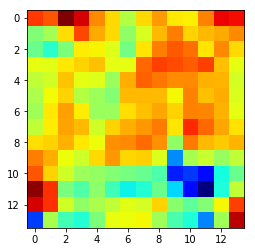

In [11]:
diseases = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening', 
'Cardiomegaly', 'Nodule', 'Mass', 'Hernia']

indv_features = features[0,:,:,:]
pred = np.argmax(res[0]) # use np.argmax to find the highest probability

cam_features = indv_features # feature maps
cam_weights = saved_weights[:, pred] # the weights from the last layer
cam_output = np.dot(cam_features, cam_weights) # calculate the dot product

sorted_pred = np.sort(res)
plt.imshow(cam_output, cmap='jet')
lbl_str = [lbl for lbl in diseases]
pred_str = [p for p in sorted_pred]
# plt.title('Potential Diseases\n' + ' '.join(lbl_str) + '\n')
print("Potential Diseases")
# print(i + ": " + j for (i, j) in zip(diseases, res))
for i in range(len(diseases)):
    print("%s: %.2f%%" % (diseases[i], res[0][i] * 100))

In [59]:
res[0]

array([0.12157238, 0.02615358, 0.17299002, 0.16066855, 0.03131427,
       0.03190433, 0.03470322, 0.14640675, 0.02316624, 0.08405782,
       0.03049823, 0.06140219, 0.05748193, 0.01768045], dtype=float32)

In [36]:
np.sum(res)

0.99999994

In [44]:
np.sort(res)

array([[0.01768045, 0.02316624, 0.02615358, 0.03049823, 0.03131427,
        0.03190433, 0.03470322, 0.05748193, 0.06140219, 0.08405782,
        0.12157238, 0.14640675, 0.16066855, 0.17299002]], dtype=float32)